In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import blogres
from math import pi
from ipywidgets import interact
from IPython.display import display

This notebook is from http://www.southampton.ac.uk/~ol1g13/stonerwohlfarth.html

# The Stoner-Wohlfarth Model for a single domain magnetic nanoparticle

The Stoner-Wohlfarth model [1] is a classic study in nanomagnetics; it can be used to investigate hysteresis loops and equilibirum states for an isolated magnetic nanoparticle. The model is restricted to particles that are small enough to be composed of a single-domain (i.e. atomic magnetic moments are aligned) and to be isolated, so that we don't have to consider interaction with other particles.

**This ipython notebook outlines the model, the theory behind it and how it can be used to determine magnetic 'easy-axes' in thermal equilibrium.**

## The Theory

The Stoner-Wohlfarth model is a model of an isolated single domain particle with a uni-axial magnetocrystalline anisotropy and an externally applied field; the coordinate system is defined such that the anisotropy easy axis lies parallel to the $z$-axis and the applied field lies in the $x-z$ plane.

The model is used to determine the direction of the magnetic moment vector is thermal equilibrium, this is done by finding the lowest energy states (or the minima of the energyscape). When we refer to the *states* of the system, we simply mean the set of angles $\left[0,2\pi\right]$ that the magnetic moment vector can take.

The plot below gives a clear picture of the set up:

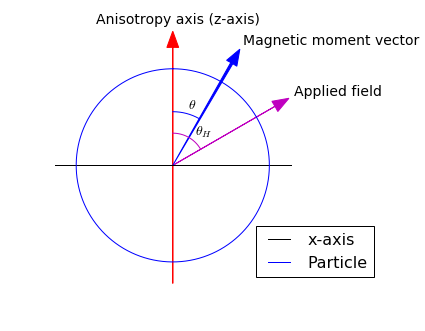

In [5]:
blogres.drawSWsketch()

Using these conventions the total energy of the system is given by:
\begin{equation}
  E=E_a+E_z=\left(\mathbf{k}\times\hat{\mathbf{m}}\right)^2+\left(-\mathbf{m}\cdot\mathbf{B}\right)
\end{equation}
where $E_a$ is the anisotropy energy, $\mathbf{k}$ is the anisotropy parameter and
$\hat{\mathbf{m}}$ is the unit vector for the magnetic moment
$\mathbf{m}=M_s\hat{\mathbf{m}}$; $E_z$ is the Zeeman energy and represents the
interaction with an external field $\mathbf{B}$. Using standard linear algebra this can be
transformed:
\begin{equation}
  E=k\sin^2\theta-\mathbf{m}\cdot\mathbf{B}
\end{equation}
where $\theta$ is the angle between the anisotropy axis and the magnetic moment
direction. The parameters can also be converted to their per volume equivalents
(i.e. $\mathbf{m}=V\mathbf{M}$ and $k=VK$); further assuming CGS units $\mathbf{B}=\mathbf{H}$.
\begin{equation}
  E=VK\sin^2\theta-V\mathbf{M}\cdot\mathbf{H}
\end{equation}
The equations can then be normalised to yield the dimensionless form:
\begin{equation}
  \frac{E}{2VK}=\frac12\sin^2\theta-\frac{M_s}{2K}\hat{\mathbf{M}}\cdot\mathbf{H}
\end{equation}
where $\mathbf{M}=M_s\hat{\mathbf{M}}$ and the anisotropy field $H_k$ is then defined as:
\begin{equation}
  H_k=\frac{2K}{M_s}
\end{equation}
and therefore:
\begin{equation}
  \frac{E}{2VK}=\frac12\sin^2\theta-\frac{\hat{\mathbf{M}}\cdot\mathbf{H}}{H_k}
\end{equation}
Let $\theta_H$ be the angle between the external field and the anisotropy axis as before,
then:
\begin{equation}
  \frac{E}{2VK}=\frac12\sin^2\theta-\frac{H\cos\left(\theta-\theta_H\right)}{H_k}
\end{equation}

## Reduced form

If we denote the dimensionless field as $h=H/H_k$ and the reduced energy as $e=E/(2VK)$ then we have the non-dimensionalised form of the Stoner-Wohlfarth model, suitable for computation:
\begin{equation}
  e\left(\theta\right)=\frac12\sin^2\theta-h\cos\left(\theta-\theta_H\right)
\end{equation}

## Example of an energyscape

The plot below shows an energyscape for the trivial case of no external field, which is a plot of the free energy against the state of the magnetic moment (the angle with the positive $z$-axis).

The function `SWenergy()` implements the non-dimensionalised equation above and `minMaxSW()` provides an interface to a numerical optimiser that searches for the minima and maxima on the energyscape; these represent the easy and hard axes respectively.

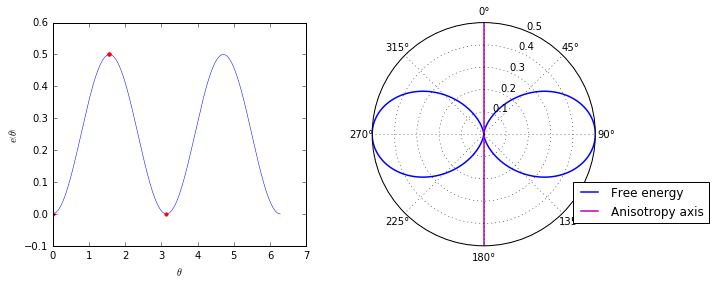

In [6]:
h = 0
th = 0.3
tm = np.linspace(0,2*pi,10000)
em = blogres.SWenergy(tm, h, th)
minaxes = blogres.minMaxSW(h, th)

fg = plt.figure(figsize=(10,4))
ax1 = fg.add_subplot(121)
ax2 = fg.add_subplot(122, polar=True)
ax1.plot(tm, em, 'b-', lw=0.5)
ax1.plot([x[0] for x in minaxes], [x[1] for x in minaxes], 'r.', ms=7)
ax1.set_ylim(-0.1,0.6)
ax1.set_xlabel('$\\theta$')
ax1.set_ylabel('$e\\left(\\theta\\right)$')
ax2.plot(tm, em, 'b-', lw=1.5, label='Free energy')
ax2.plot([0, pi], [0.5, 0.5], 'm-', lw=1.5, label='Anisotropy axis')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
lg2 = ax2.legend(loc=(0.9,0.1))

The two plots show the same variation of free energy, on a polar and cartesian plot. The cartesian plot is often called an *energy landscape* or *energyscape*, which shows how the free energy of the system varies with changing a single state of the system. The red dots show the minima and maxima of the system. In thermal equilibrium, we would expect to find the system in its lowest energy state.

The plot on the right, is a typical plot for showing the free energy of a particle, it more explicitly shows the variation with the angle of the magnetic moment vector. In this example, without an external field, the easy-axis is aligned with the anisotropy axis, as we would expect.

## Interactive energyscape

The widget below lets you play around with the effects of varying the strength and angle of the applied field. Try increasing the the applied field parallel to the anisotropy axis, what happens? How about when you start changing the angle?

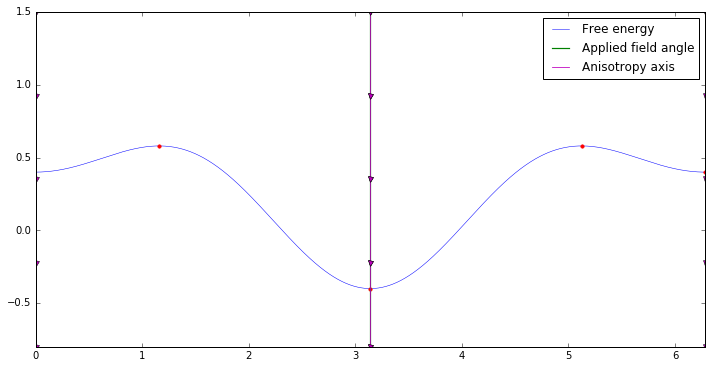

In [7]:
interact(blogres.eswidget, h=(0, 0.6), th=(0, 2*pi));

**References**

[1] E. C. Stoner and E. P. Wohlfarth. A mechanism of magnetic hysterisis in heterogenous allows. *Philosophical Transactions of the Royal Society of London. Series A, Mathematical and Physical Sciences*, 240(826):599-642, 1948.

-----------------------------------------------------------------
Copyright (C) 2014  Oliver W. Laslett <O.Laslett@soton.ac.uk>

Please see full copyright notice: https://bitbucket.org/olaslett/blog_tutorial_resources/raw/tip/LICENSE